In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=11370


In [2]:
H = create_hamiltonian(system), 0.05

In [3]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

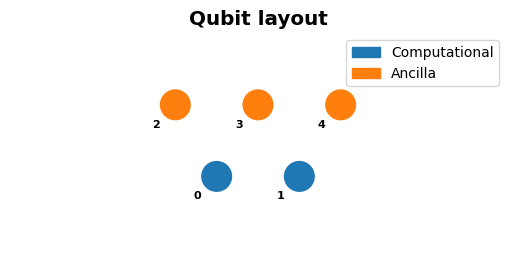

In [4]:
qubits.show_layout()

In [5]:
# theta_opt = np.load("losses_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=400, n_grad=10, theta_init=np.ones(circuit.P)*0.1)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=1103


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.027353513869093904 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.37513345e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.73535139e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.72881600e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000000

In [7]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [8]:
theta_opt

array([-0.02159199,  0.06669314,  0.1       ,  0.1       ,  0.1       ,
        0.03024063, -0.59443281,  0.11095053,  0.17789672,  0.23515709,
        0.02626284, -0.04577916,  0.09936597,  0.09271595,  0.09502912,
        0.02528905, -0.09882265, -0.01424015,  0.09517568,  0.0789891 ,
        0.09560462,  0.07240868,  0.48189983,  0.28554173,  0.16075535,
        0.1016879 ,  0.01930784, -0.21547745,  0.06874579,  0.07712348,
        0.09990076, -0.35487858,  0.1142054 ,  0.0902396 ,  0.0848448 ,
        0.09530906,  0.08845093,  0.01119953,  0.21679131,  0.2544419 ,
        0.14111557,  0.30041935,  0.07836932,  0.11500655,  0.08255089,
        0.09340801,  0.09388962,  0.04216931, -0.24687419,  0.14593899,
        0.08836337,  0.07961871,  0.08856803,  0.16216146, -0.74756952,
        0.19409964,  0.15362805,  0.10255942, -0.04835085,  0.07677713,
        0.09593833,  0.09618259,  0.07061674, -0.05253868,  0.13803129,
       -0.03416976,  0.09553095,  0.08427167,  0.10105748,  0.06

c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

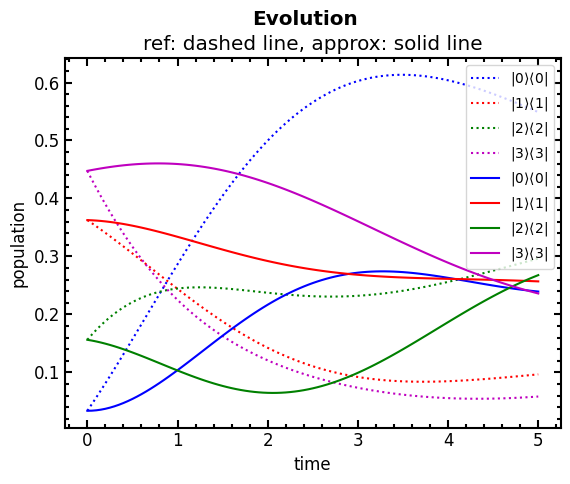

In [9]:
rho0 = rho_rand_haar(m, 4)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(100, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.05, N=100, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

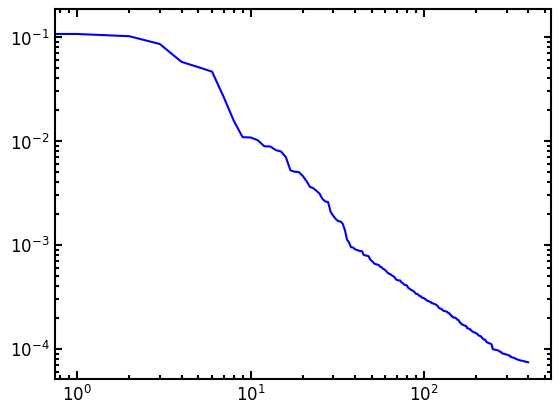

In [10]:
plt.loglog(errors)